In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

# Read in CSV file
data = pd.read_csv("opiod-analysis/Resources/Health04/Health04_C.csv")
data

,G_COUNTYFP,COUNTYFP,st_abb,cnty_name,opPrscRt,odMortRt14,odMortRt15,odMortRt16,odMortRt17,odMortRt18,odMortRtAv
0,G01001,1001,AL,Autauga County,101.3,10.0,10.8,12.5,12.2,13.2,11.74
1,G01003,1003,AL,Baldwin County,67.6,17.7,19.6,17.5,16.6,16.6,17.60
2,G01005,1005,AL,Barbour County,27.2,9.9,12.2,12.4,12.8,14.6,12.38
3,G01007,1007,AL,Bibb County,21.0,17.1,17.5,21.6,21.7,23.0,20.18
4,G01009,1009,AL,Blount County,23.7,18.6,19.4,22.6,25.8,21.7,21.62
...,...,...,...,...,...,...,...,...,...,...,...
3139,G56037,56037,WY,Sweetwater Coun,70.0,20.5,18.1,23.6,21.1,21.2,20.90
3140,G56039,56039,WY,Teton County,54.6,13.3,14.4,16.9,17.4,17.5,15.90
3141,G56041,56041,WY,Uinta County,59.5,22.3,22.8,24.0,24.1,22.9,23.22
3142,G56043,56043,WY,Washakie County,46.7,16.8,18.1,20.2,22.7,23.6,20.28


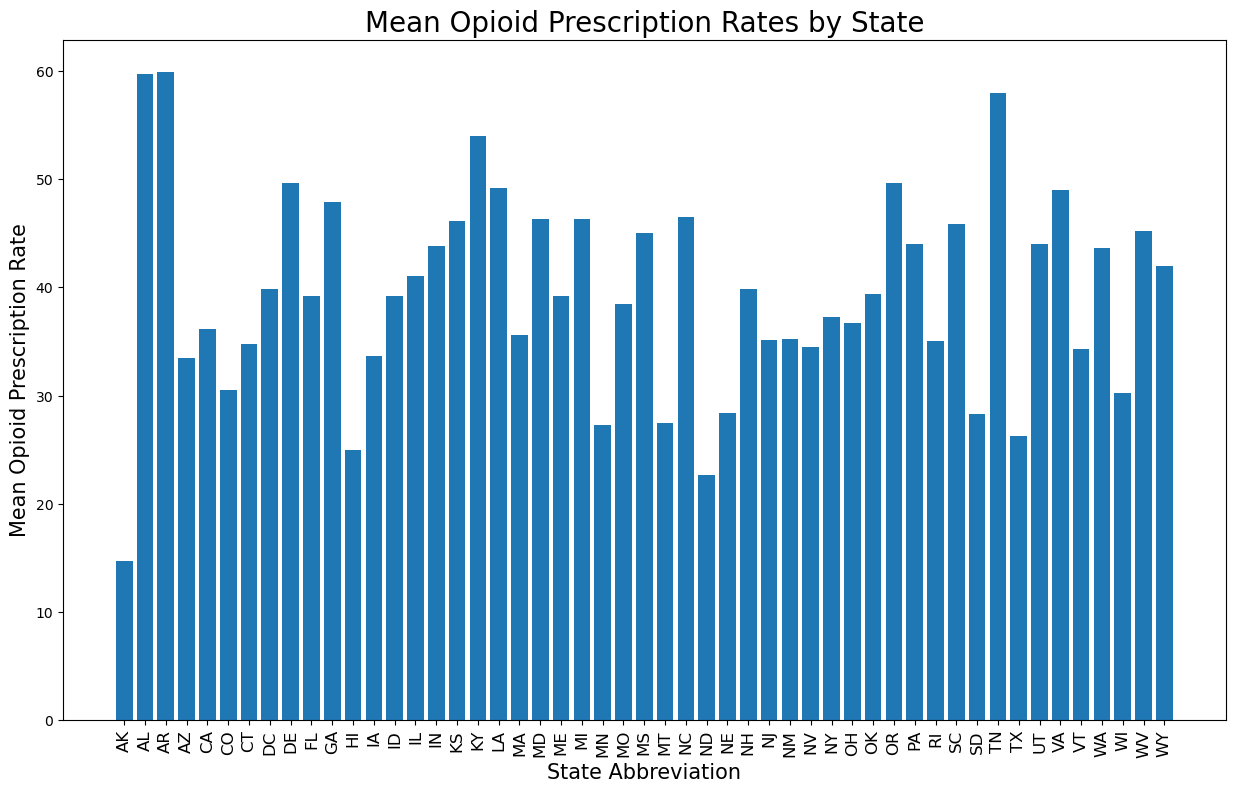

In [5]:
# Group data by state abbreviation and calculate the mean for each group
grouped_data = data.groupby('st_abb')['opPrscRt'].mean()

# Set figure size
plt.figure(figsize=[15, 10])

# Plot the data as a bar chart
plt.bar(grouped_data.index, grouped_data.values)

# Set chart title and labels for the axes
plt.title('Mean Opioid Prescription Rates by State', fontsize=20)
plt.xlabel('State Abbreviation', fontsize=15)
plt.ylabel('Mean Opioid Prescription Rate', fontsize=15)

# Rotate the x-axis labels and adjust the spacing
plt.xticks(rotation=90, ha='center', va='top', fontsize=12)
plt.subplots_adjust(bottom=0.2)

# Show the chart
plt.show()


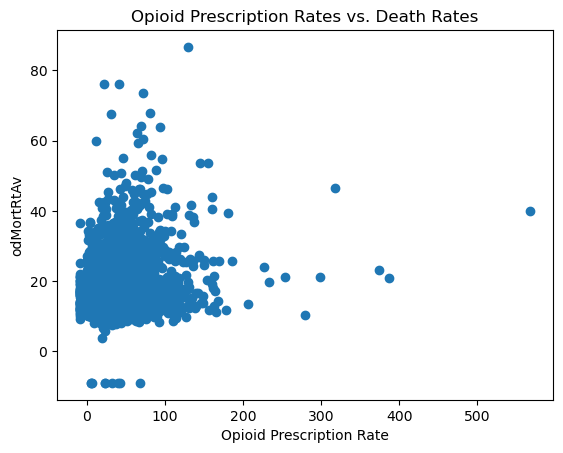

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Read in CSV file
data = pd.read_csv("opiod-analysis/Resources/Health04/Health04_C.csv")

# Create a scatter plot of opPrscRt vs. deathrate
plt.scatter(data['opPrscRt'], data['odMortRtAv'])

# Set chart title and labels for the axes
plt.title('Opioid Prescription Rates vs. Death Rates')
plt.xlabel('Opioid Prescription Rate')
plt.ylabel('odMortRtAv')

# Show the chart
plt.show()


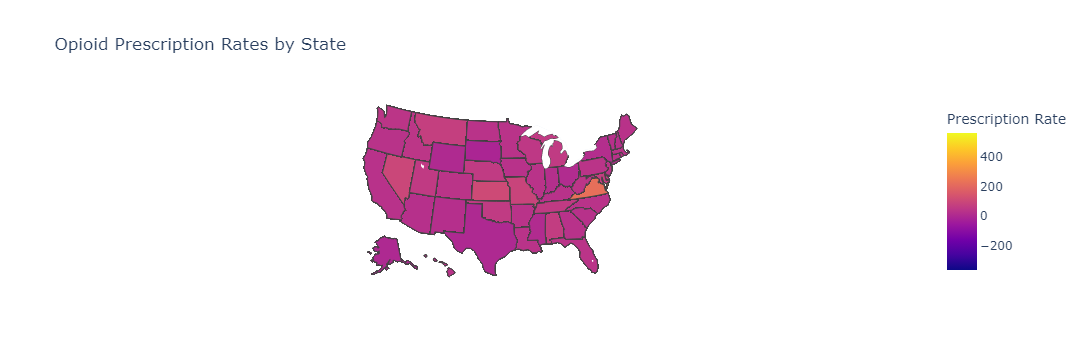

In [6]:
# Read in CSV file
data = pd.read_csv("opiod-analysis/Resources/Health04/Health04_C.csv")

# Create a choropleth map plot of opPrscRt by state
fig = px.choropleth(data, locations='st_abb', locationmode="USA-states", color='opPrscRt',
                    scope="usa", color_continuous_scale=px.colors.sequential.Plasma,
                    title='Opioid Prescription Rates by State',
                    color_continuous_midpoint=100,
                    labels={'opPrscRt': 'Opioid Prescription Rate'},
                    )
fig.update_layout(coloraxis_colorbar=dict(title='Prescription Rate'))
fig.show()
